<a href="https://colab.research.google.com/github/fitriariskaa19/indian_food/blob/main/indian_food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/drive/MyDrive/data_set/indian_food.csv')

df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [ ]:
df.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [ ]:
df.shape

(255, 9)

In [ ]:
df.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [ ]:
df['region'].mode()

0    West
dtype: object

In [ ]:
df[df['region'].isnull()]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
110,Panjeeri,"Whole wheat flour, musk melon seeds, poppy see...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,NaN


In [ ]:
pd.crosstab(df['state'], df['region'])

region,-1,Central,East,North,North East,South,West
state,,,,,,,
-1,13,0,0,1,0,10,0
Andhra Pradesh,0,0,0,0,0,10,0
Assam,0,0,0,0,21,0,0
Bihar,0,0,0,3,0,0,0
Chhattisgarh,0,1,0,0,0,0,0
Goa,0,0,0,0,0,0,3
Gujarat,0,0,0,0,0,0,35
Haryana,0,0,0,1,0,0,0
Jammu & Kashmir,0,0,0,2,0,0,0


In [ ]:
df['region'] = df['region'].fillna('North')

In [ ]:
df.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            0
dtype: int64

In [ ]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [ ]:
food_vocab = set()

for ingredients in df['ingredients']:
    for food in ingredients.split(','):
# we dont want any Capital character and dont want any spaces and want all unique food value in food_vocab, so below loop will make sure
        if food.strip().lower() not in food_vocab:
            food_vocab.add(food.strip().lower())


In [ ]:
len(food_vocab)

365

In [ ]:
ing_df = pd.DataFrame()

for i, ingredients in enumerate(df['ingredients']):
    for food in ingredients.split(','):
        if food.strip().lower() in food_vocab:
            ing_df.loc[i, food.strip().lower()] = 1

In [ ]:
ing_df = ing_df.fillna(0)

In [ ]:
ing_df.head()

,maida flour,yogurt,oil,sugar,gram flour,ghee,carrots,milk,cashews,raisins,...,soaked rice,cardamom pods,red pepper,watercress,glutinous rice,egg yolks,dry dates,dried rose petals,arrowroot powder,ginger powder
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.drop(['name', 'ingredients'], axis = 1, inplace = True)

In [ ]:
category = [feature for feature in df.columns if df[feature].dtypes == 'O']

In [ ]:
category

['diet', 'flavor_profile', 'course', 'state', 'region']

In [ ]:
for value in category:
    print(value)
    print(df[value].value_counts())
    print('----------........-----------')

diet
vegetarian        226
non vegetarian     29
Name: diet, dtype: int64
----------........-----------
flavor_profile
spicy     133
sweet      88
-1         29
bitter      4
sour        1
Name: flavor_profile, dtype: int64
----------........-----------
course
main course    129
dessert         85
snack           39
starter          2
Name: course, dtype: int64
----------........-----------
state
Gujarat            35
Punjab             32
Maharashtra        30
West Bengal        24
-1                 24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Karnataka           6
Rajasthan           6
Telangana           5
Bihar               3
Goa                 3
Manipur             2
Jammu & Kashmir     2
Madhya Pradesh      2
Uttarakhand         1
Tripura             1
Nagaland            1
NCT of Delhi        1
Chhattisgarh        1
Haryana             1
Name: state, dtype: int64
----------........------

In [ ]:
df[['prep_time', 'cook_time']] = df[['prep_time', 'cook_time']].replace(-1, np.NaN)

In [ ]:
df[['flavor_profile', 'state', 'region']] = df[['flavor_profile', 'state', 'region']].replace('-1', np.NaN)

In [ ]:
df['prep_time'] = df['prep_time'].fillna(df['prep_time'].mean())

In [ ]:
df['cook_time'] = df['cook_time'].fillna(df['cook_time'].mean())

In [ ]:
def one_hot_encode(df, column, prefixes):
    df = df.copy()
    for col, prefix in zip(column, prefixes):
        dum = pd.get_dummies(df[col], prefix = prefix)
        df = pd.concat([df, dum], axis = 1)
        df = df.drop(col, axis = 1)
        
    return df

In [ ]:
data = one_hot_encode(df, ['flavor_profile', 'course', 'state', 'region'], ['f', 'c', 's', 'r'])

In [ ]:
data.head()

,diet,prep_time,cook_time,f_bitter,f_sour,f_spicy,f_sweet,c_dessert,c_main course,c_snack,...,s_Tripura,s_Uttar Pradesh,s_Uttarakhand,s_West Bengal,r_Central,r_East,r_North,r_North East,r_South,r_West
0,vegetarian,45.0,25.0,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
1,vegetarian,80.0,30.0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,vegetarian,15.0,60.0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,vegetarian,15.0,30.0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,vegetarian,15.0,40.0,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0


In [ ]:
lbl = LabelEncoder()

data['diet'] = lbl.fit_transform(data['diet'])

In [ ]:
{index: label for index, label in enumerate(lbl.classes_)}

{0: 'non vegetarian', 1: 'vegetarian'}

In [ ]:
x = data.drop('diet', axis = 1)
#x = pd.concat([x, ing_df], axis = 1)
y = data['diet']

In [ ]:
x.shape, y.shape

((255, 40), (255,))

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, stratify = y, test_size = 0.35)

In [ ]:
xtrain.shape, xtest.shape

((165, 40), (90, 40))

In [ ]:
import tensorflow as tf

In [ ]:
def build_model(num_features, hidden_layer_sizes=(64, 64)):
    inputs = tf.keras.Input(shape=(num_features,))
    x = tf.keras.layers.Dense(hidden_layer_sizes[0], activation='relu')(inputs)
    x = tf.keras.layers.Dense(hidden_layer_sizes[1], activation='relu')(x)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            tf.keras.metrics.AUC(name='auc')
        ]
    )
    
    return model

In [ ]:
food_model = build_model(40, hidden_layer_sizes=(128, 128))

In [ ]:
food_batch_size = 64
food_epochs = 200

food_history = food_model.fit(
    xtrain,
    y,
    validation_split=0.2,
    batch_size=food_batch_size,
    epochs=food_epochs,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

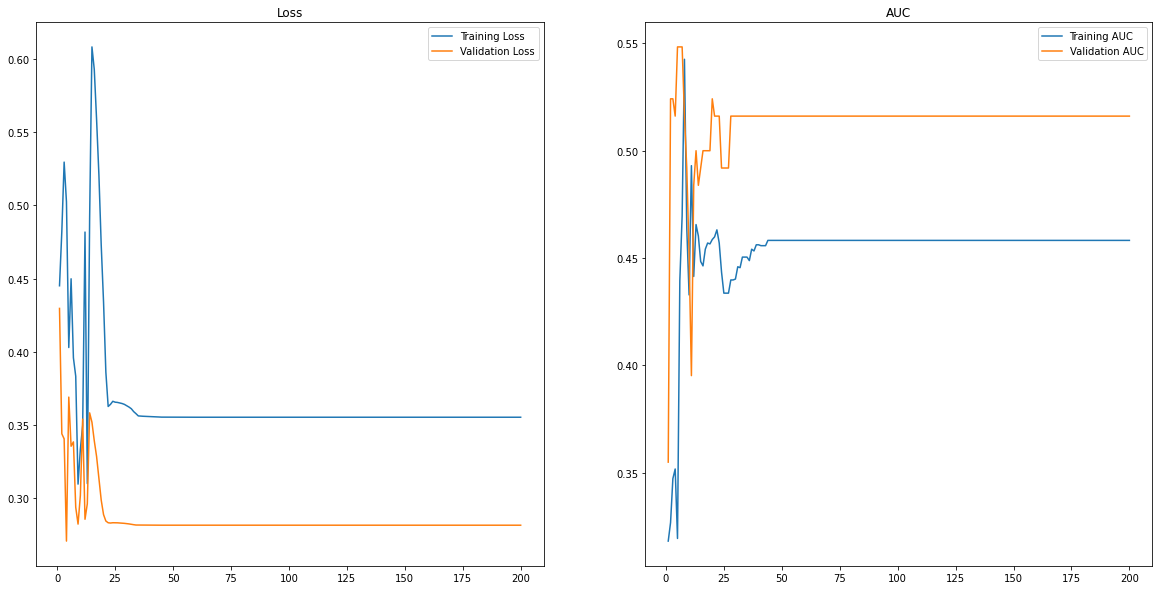

In [ ]:
plt.figure(figsize=(20, 10))

food_epochs_range = range(1, food_epochs + 1)
food_train_loss, food_val_loss = food_history.history['loss'], food_history.history['val_loss']
food_train_auc, food_val_auc = food_history.history['auc'], food_history.history['val_auc']

plt.subplot(1, 2, 1)
plt.plot(food_epochs_range, food_train_loss, label="Training Loss")
plt.plot(food_epochs_range, food_val_loss, label="Validation Loss")
plt.title("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(food_epochs_range, food_train_auc, label="Training AUC")
plt.plot(food_epochs_range, food_val_auc, label="Validation AUC")
plt.title("AUC")
plt.legend()

plt.show()

In [ ]:
print(np.argmin(food_val_loss), np.argmax(food_val_auc))

3 4


In [ ]:
food_model.evaluate(xtest, ytest)

3/3 [==============================] - 0s 4ms/step - loss: 0.4370 - accuracy: 0.8889 - auc: 0.5337


[0.43695491552352905, 0.8888888955116272, 0.5337499380111694]